# Ejercicios capítulo 7

Ejercicios prácticos de programación en Python enfocados en conceptos básicos como son:

  - Análisis práctico de datos
  - Métricas Descriptivas Numéricas
  - Visualización de la distribución univariada
  - Análisis Descriptivo por Grupos
  - Cuantificando Relaciones
  - Distribuciones de Probabilidad
  - Algoritmo de regresión
  - Pruebas estadísticas
  - Simulaciones

### **Ejercicio 1: Modelo de Machine Learning - Regresión Lineal Simple**

**Instrucciones:**

**Paso 1: Importar las Librerías y Preparar los Datos**

1.  **Importa las librerías necesarias**: `numpy` como `np`, `pandas` como `pd`, `matplotlib.pyplot` como `plt`, y de `sklearn` importa `LinearRegression` y `r2_score`.
2.  **Genera datos simulados**:
    * Crea un array de NumPy llamado `gasto_publicidad` con 100 valores entre 1,000 y 10,000. `np.random.uniform(1000, 10000, 100)` es una buena opción.
    * Crea un array `ventas` que dependa linealmente del gasto. Por ejemplo: `ventas = 15000 + (gasto_publicidad * 3.5) + np.random.normal(0, 5000, 100)` (un ingreso base + 3.5x por cada peso en publicidad + ruido aleatorio).
3.  **Crea un DataFrame de Pandas** con estos dos arrays y las columnas `'Gasto_Publicidad'` y `'Ventas'`.

**Paso 2: Preparar y Entrenar el Modelo**

1.  **Separa las variables**: Asigna la columna `'Gasto_Publicidad'` a tu variable `X` y la columna `'Ventas'` a tu variable `y`.
2.  **Asegura el formato de X**: `scikit-learn` requiere que `X` sea una estructura 2D. Asegúrate de seleccionarla con dobles corchetes: `X = df[['Gasto_Publicidad']]`.
3.  **Crea y entrena el modelo**:
    * Crea una instancia del modelo: `modelo = LinearRegression()`.
    * Entrena el modelo con tus datos usando `modelo.fit(X, y)`.

**Paso 3: Evaluar y Predecir**

1.  **Obtén los parámetros del modelo**: Imprime el **intercepto** (`.intercept_`) y la **pendiente** (`.coef_`) que el modelo aprendió.
2.  **Realiza predicciones**: Usa `modelo.predict(X)` para generar las predicciones de ventas y guárdalas en `y_pred`.
3.  **Evalúa el ajuste**: Calcula e imprime el **coeficiente R-cuadrado (R²)** usando `r2_score(y, y_pred)` para medir qué tan bien explica el gasto en publicidad a las ventas.

**Paso 4: Visualizar los Resultados**

1.  **Crea un gráfico de dispersión** (`plt.scatter`) de los datos originales (`X` vs `y`).
2.  **Superpón la línea de regresión**: En el mismo gráfico, dibuja la línea del modelo usando `plt.plot()` con `X` y las predicciones `y_pred`. Dale un color distintivo (ej. 'red').
3.  **Personaliza y muestra** el gráfico con un título, etiquetas para los ejes y una leyenda.

--- Primeras 5 filas del Dataset Simulado ---
   Gasto_Publicidad        Ventas
0       4370.861070  30733.249085
1       9556.428758  46952.463900
2       7587.945476  42016.613050
3       6387.926358  27419.897679
4       2404.167764  22316.227735


--- Entrenando el Modelo de Regresión Lineal ---
¡Modelo entrenado!

--- Evaluación del Modelo ---
Intercepto (ventas base): $16,330.91
Pendiente (retorno por peso gastado): $3.24
Coeficiente R-cuadrado (R²): 0.7875


--- Visualización del Modelo ---


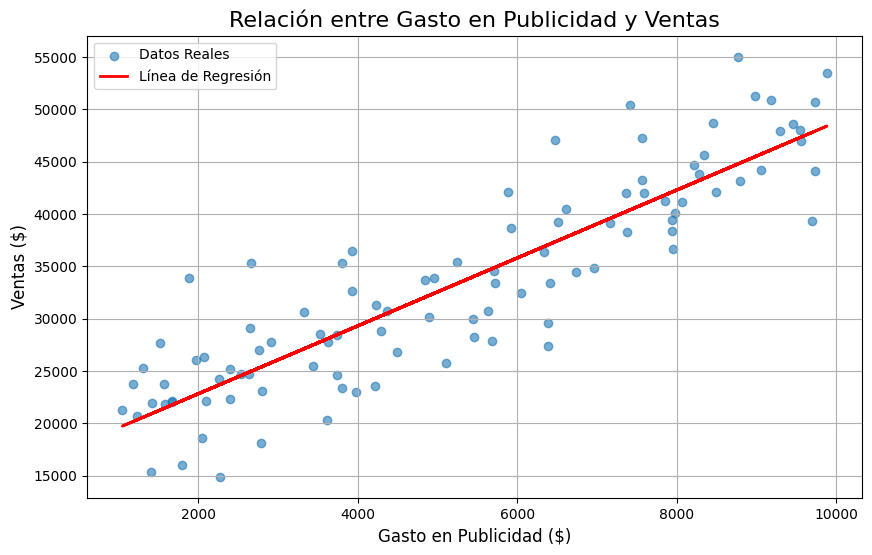

In [1]:
# Paso 1: Importar las Librerías y Preparar los Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Para que la simulación sea reproducible
np.random.seed(42)

# Generar datos simulados
gasto_publicidad = np.random.uniform(1000, 10000, 100)
# Ventas = Base + 3.5 * Gasto + Ruido Aleatorio
ruido = np.random.normal(0, 5000, 100)
ventas = 15000 + (gasto_publicidad * 3.5) + ruido

# Crear DataFrame
df = pd.DataFrame({'Gasto_Publicidad': gasto_publicidad, 'Ventas': ventas})

print("--- Primeras 5 filas del Dataset Simulado ---")
print(df.head())
print("\n" + "="*50 + "\n")


# Paso 2: Preparar y Entrenar el Modelo
print("--- Entrenando el Modelo de Regresión Lineal ---")
# Separar variables
X = df[['Gasto_Publicidad']] # DataFrame 2D para X
y = df['Ventas']             # Serie 1D para y

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)
print("¡Modelo entrenado!\n")


# Paso 3: Evaluar y Predecir
print("--- Evaluación del Modelo ---")
# Obtener parámetros
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]
print(f"Intercepto (ventas base): ${intercepto:,.2f}")
print(f"Pendiente (retorno por peso gastado): ${pendiente:.2f}")

# Realizar predicciones
y_pred = modelo.predict(X)

# Evaluar el ajuste del modelo
r2 = r2_score(y, y_pred)
print(f"Coeficiente R-cuadrado (R²): {r2:.4f}")
print("\n" + "="*50 + "\n")


# Paso 4: Visualizar los Resultados
print("--- Visualización del Modelo ---")
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los datos reales
plt.scatter(X, y, alpha=0.6, label='Datos Reales')

# Línea de regresión del modelo
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de Regresión')

# Personalización
plt.title('Relación entre Gasto en Publicidad y Ventas', fontsize=16)
plt.xlabel('Gasto en Publicidad ($)', fontsize=12)
plt.ylabel('Ventas ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### **Ejercicio 2: Regresión Lineal Múltiple para Predecir Precios de Vivienda**

**Instrucciones:**

**Paso 1: Generar un Dataset Más Complejo**

1.  **Importa las librerías necesarias** (`numpy`, `pandas`, `sklearn`, etc.).
2.  **Simula un dataset de viviendas** con 200 observaciones. Necesitarás las siguientes características (variables `X`):
    * `Superficie_m2`: Valores aleatorios uniformes entre 80 y 250 m².
    * `Num_Habitaciones`: Valores aleatorios enteros entre 2 y 6.
    * `Antiguedad_Anios`: Valores aleatorios enteros entre 0 y 50 años.
3.  **Crea la variable objetivo (`y`)**, el `Precio_Vivienda` (en miles de USD), basándote en una relación lineal con las características anteriores más un ruido aleatorio. Por ejemplo:
    `Precio = 15 + (Superficie * 1.2) + (Habitaciones * 5) - (Antigüedad * 0.8) + Ruido`
4.  **Crea un DataFrame de Pandas** con todas estas columnas.

**Paso 2: Entrenar el Modelo Múltiple**

1.  **Define tus variables `X` e `y`**:
    * `y` debe ser la columna `'Precio_Vivienda'`.
    * `X` debe ser un DataFrame que contenga las **tres columnas** de características: `['Superficie_m2', 'Num_Habitaciones', 'Antiguedad_Anios']`.
2.  **Crea y entrena el modelo** de `LinearRegression` usando el método `.fit(X, y)`.

**Paso 3: Evaluar e Interpretar los Coeficientes**

1.  **Imprime el intercepto** (`.intercept_`) del modelo.
2.  **Imprime los coeficientes** (`.coef_`) del modelo. Observarás que ahora hay un coeficiente por cada característica en `X`.
3.  Para una mejor interpretación, **crea un pequeño DataFrame de Pandas** que muestre el nombre de cada característica junto a su coeficiente correspondiente.
4.  **Calcula e imprime el R-cuadrado (R²)** para evaluar el ajuste general del modelo.

**Paso 4: Predecir sobre Nuevos Datos**

1.  Imagina que tienes una **vivienda nueva** con las siguientes características: 150 m², 3 habitaciones y 5 años de antigüedad.
2.  **Crea un nuevo DataFrame** con estos datos. Asegúrate de que tenga las mismas columnas que el `X` original.
3.  Utiliza `modelo.predict()` sobre este nuevo DataFrame para **predecir el precio** de esta vivienda específica.
4.  **Muestra la predicción** de una forma clara.

In [2]:
# Paso 1: Importar Librerías y Generar Datos
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(101) # Para reproducibilidad

# Simular datos
n_muestras = 200
superficie = np.random.uniform(80, 250, n_muestras)
habitaciones = np.random.randint(2, 7, n_muestras)
antiguedad = np.random.randint(0, 51, n_muestras)

# Crear el precio con una relación lineal + ruido
ruido = np.random.normal(0, 15, n_muestras)
precio = 15 + (superficie * 1.2) + (habitaciones * 5) - (antiguedad * 0.8) + ruido

# Crear DataFrame
df_viviendas = pd.DataFrame({
    'Superficie_m2': superficie,
    'Num_Habitaciones': habitaciones,
    'Antiguedad_Anios': antiguedad,
    'Precio_Vivienda': precio
})

print("--- Primeras 5 filas del Dataset de Viviendas ---")
print(df_viviendas.head())
print("\n" + "="*60 + "\n")


# Paso 2: Entrenar el Modelo Múltiple
print("--- Entrenando el Modelo de Regresión Múltiple ---")
# Definir las características (X) y el objetivo (y)
caracteristicas = ['Superficie_m2', 'Num_Habitaciones', 'Antiguedad_Anios']
X = df_viviendas[caracteristicas]
y = df_viviendas['Precio_Vivienda']

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)
print("¡Modelo entrenado!\n")


# Paso 3: Evaluar e Interpretar los Coeficientes
print("--- Evaluación e Interpretación del Modelo ---")
print(f"Intercepto (Precio base): ${modelo.intercept_ * 1000:,.2f}")

# Crear un DataFrame para ver los coeficientes claramente
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coeficientes)

# Evaluar el ajuste general
y_pred_entrenamiento = modelo.predict(X)
r2 = r2_score(y, y_pred_entrenamiento)
print(f"\nCoeficiente R-cuadrado (R²): {r2:.4f}")
print("\n" + "="*60 + "\n")


# Paso 4: Predecir sobre Nuevos Datos
print("--- Predicción para una Nueva Vivienda ---")
# Crear un DataFrame para la nueva observación
vivienda_nueva = pd.DataFrame({
    'Superficie_m2': [150],
    'Num_Habitaciones': [3],
    'Antiguedad_Anios': [5]
})

# Realizar la predicción
precio_predicho = modelo.predict(vivienda_nueva)

print(f"Características de la nueva vivienda:\n{vivienda_nueva}")
print(f"\nPrecio predicho para la nueva vivienda: ${precio_predicho[0] * 1000:,.2f}")

--- Primeras 5 filas del Dataset de Viviendas ---
   Superficie_m2  Num_Habitaciones  Antiguedad_Anios  Precio_Vivienda
0     167.787767                 6                49       208.455369
1     177.013490                 5                12       274.636345
2      84.840619                 3                34       112.309738
3     109.158682                 6                 3       170.052194
4     196.497087                 4                32       234.911747


--- Entrenando el Modelo de Regresión Múltiple ---
¡Modelo entrenado!

--- Evaluación e Interpretación del Modelo ---
Intercepto (Precio base): $12,061.67

Coeficientes del modelo:
                  Coeficiente
Superficie_m2        1.218254
Num_Habitaciones     5.796245
Antiguedad_Anios    -0.876510

Coeficiente R-cuadrado (R²): 0.9474


--- Predicción para una Nueva Vivienda ---
Características de la nueva vivienda:
   Superficie_m2  Num_Habitaciones  Antiguedad_Anios
0            150                 3                 5



### **Ejercicio 3: Selección de Variables con Regresión Lasso**

**Instrucciones:**

**Paso 1: Generar un Dataset con una Variable Irrelevante**

1.  **Importa las librerías necesarias**: `numpy`, `pandas`, `Lasso` y `StandardScaler`.
2.  **Simula un dataset** de 100 observaciones para predecir el éxito de un producto.
    * `Gasto_Marketing`: Variable útil. Números aleatorios entre 50 y 200.
    * `Calidad_Producto`: Variable útil. Puntuaciones aleatorias entre 1 y 10.
    * `Consultores_Externos`: **Variable inútil/ruido**. Simplemente números aleatorios que no tendrán relación con el éxito.
3.  **Crea la variable objetivo `Exito_Producto`**: Su valor debe depender del `Gasto_Marketing` y la `Calidad_Producto`, más un ruido aleatorio. Asegúrate de que `Consultores_Externos` **no** forme parte de esta ecuación.
4.  **Crea un DataFrame de Pandas** con las cuatro columnas.

**Paso 2: Preparar y Estandarizar los Datos**

1.  **Separa tus datos**: Crea `X` (un DataFrame con las 3 características) e `y` (la Serie `Exito_Producto`).
2.  **Estandariza `X`**: Dado que Lasso es sensible a la escala de las variables, utiliza `StandardScaler` para estandarizarlas. Crea una instancia del escalador, ajústalo y transforma `X` en `X_scaled`.

**Paso 3: Entrenar el Modelo Lasso**

1.  **Crea y entrena un modelo Lasso**:
    * Crea una instancia de `Lasso`. Un buen punto de partida es `alpha=1.0`. `alpha` controla la fuerza de la penalización.
    * Entrena el modelo usando los datos estandarizados: `modelo_lasso.fit(X_scaled, y)`.

**Paso 4: Interpretar los Coeficientes**

1.  **Muestra el intercepto y los coeficientes** del modelo entrenado.
2.  Para una mejor interpretación, **crea un DataFrame de Pandas** que muestre el nombre de cada característica junto a su coeficiente correspondiente.
3.  **Analiza el resultado**: Observa cómo el coeficiente para la variable `Consultores_Externos` es cero (o muy cercano a cero), demostrando que Lasso ha identificado y eliminado la variable inútil del modelo.

In [3]:
# Paso 1: Importar Librerías y Generar Datos
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Para reproducibilidad
np.random.seed(42)

# Simular datos
n_muestras = 100
gasto_marketing = np.random.uniform(50, 200, n_muestras)
calidad_producto = np.random.uniform(1, 10, n_muestras)
consultores_externos = np.random.uniform(10, 50, n_muestras) # Variable ruido

# El éxito depende del marketing y la calidad, pero NO de los consultores
ruido = np.random.normal(0, 5, n_muestras)
exito_producto = 10 + (gasto_marketing * 0.3) + (calidad_producto * 4) + ruido

# Crear DataFrame
df = pd.DataFrame({
    'Gasto_Marketing': gasto_marketing,
    'Calidad_Producto': calidad_producto,
    'Consultores_Externos': consultores_externos,
    'Exito_Producto': exito_producto
})

print("--- Primeras 5 filas del Dataset Simulado ---")
print(df.head().round(2))
print("\n" + "="*60 + "\n")


# Paso 2: Preparar y Estandarizar los Datos
print("--- Estandarizando las variables predictoras ---")
caracteristicas = ['Gasto_Marketing', 'Calidad_Producto', 'Consultores_Externos']
X = df[caracteristicas]
y = df['Exito_Producto']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Datos estandarizados.\n")


# Paso 3: Entrenar el Modelo Lasso
print("--- Entrenando el Modelo Lasso (alpha=1.0) ---")
# Un alpha más alto aumenta la penalización
modelo_lasso = Lasso(alpha=1.0)
modelo_lasso.fit(X_scaled, y)
print("¡Modelo entrenado!\n")


# Paso 4: Interpretar los Coeficientes
print("--- Interpretación de los Coeficientes del Modelo ---")
print(f"Intercepto: {modelo_lasso.intercept_:.2f}")

# Crear un DataFrame para ver los coeficientes claramente
df_coeficientes = pd.DataFrame(
    modelo_lasso.coef_,
    index=X.columns,
    columns=['Coeficiente']
)
print("\nCoeficientes aprendidos por el modelo:")
print(df_coeficientes.round(4))
print("\nObserva cómo el coeficiente para 'Consultores_Externos' es cero,")
print("¡Lasso ha eliminado la variable irrelevante automáticamente!")

--- Primeras 5 filas del Dataset Simulado ---
   Gasto_Marketing  Calidad_Producto  Consultores_Externos  Exito_Producto
0           106.18              1.28                 35.68           47.21
1           192.61              6.73                 13.37           91.43
2           159.80              3.83                 16.47           83.98
3           139.80              5.58                 45.94           77.42
4            73.40              9.17                 34.26           58.57


--- Estandarizando las variables predictoras ---
Datos estandarizados.

--- Entrenando el Modelo Lasso (alpha=1.0) ---
¡Modelo entrenado!

--- Interpretación de los Coeficientes del Modelo ---
Intercepto: 68.43

Coeficientes aprendidos por el modelo:
                      Coeficiente
Gasto_Marketing           12.8797
Calidad_Producto           9.6969
Consultores_Externos       0.0000

Observa cómo el coeficiente para 'Consultores_Externos' es cero,
¡Lasso ha eliminado la variable irrelevante autom

### **Ejercicio 4: Comparación de Modelos - Regresión Lasso vs. Ridge**

**Instrucciones:**

**Paso 1: Generar un Dataset con Variables Correlacionadas**

1.  **Importa las librerías necesarias** (`numpy`, `pandas`, `Lasso`, `Ridge`, `StandardScaler`).
2.  **Simula un dataset** de 150 empresas para predecir su "Calificación de Sostenibilidad" (de 0 a 100). Necesitarás las siguientes características:
    * `Inversion_Social`: Gasto en proyectos sociales (variable importante).
    * `Reduccion_Emisiones`: Porcentaje de reducción de emisiones (variable importante y posiblemente correlacionada con la inversión).
    * `Multas_Ambientales`: Número de multas recibidas (variable con impacto negativo).
    * `Menciones_Prensa`: Número de menciones en prensa (variable con un impacto débil o casi nulo).
3.  **Crea la variable objetivo `Sostenibilidad`** como una función lineal de las tres primeras características (recuerda que el impacto de las multas es negativo) más un ruido aleatorio. La variable `Menciones_Prensa` debe tener un impacto real muy pequeño o nulo en la fórmula.
4.  **Crea un DataFrame de Pandas** con todas las columnas.

**Paso 2: Preparar y Entrenar los Modelos**

1.  **Separa tus datos** en `X` (un DataFrame con las 4 características) e `y` (la Serie `Sostenibilidad`).
2.  **Estandariza `X`** usando `StandardScaler` para preparar los datos para la regularización.
3.  **Entrena un modelo Lasso**: Crea una instancia de `Lasso` (puedes usar `alpha=0.5`) y ajústala a los datos estandarizados.
4.  **Entrena un modelo Ridge**: Crea una instancia de `Ridge` (usa el mismo `alpha=0.5` para una comparación justa) y ajústala a los mismos datos.

**Paso 3: Comparar y Analizar los Coeficientes**

1.  El objetivo final es comparar cómo cada modelo trató a las variables. Para ello, **crea un único DataFrame de Pandas** que contenga:
    * Una columna con los nombres de las características.
    * Una columna con los coeficientes del modelo **Lasso**.
    * Una columna con los coeficientes del modelo **Ridge**.
2.  **Muestra este DataFrame comparativo**.
3.  **Analiza los resultados**: Observa el DataFrame y responde mentalmente:
    * ¿Qué modelo llevó el coeficiente de la variable `Menciones_Prensa` a cero?
    * ¿Cómo son los coeficientes de Ridge en comparación con los de Lasso para las variables importantes? ¿Son más grandes o más pequeños?

In [4]:
# Paso 1: Importar Librerías y Generar Datos
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(101) # Para reproducibilidad

# Simular datos
n_empresas = 150
inversion_social = np.random.uniform(10, 100, n_empresas)
reduccion_emisiones = inversion_social * 0.5 + np.random.normal(0, 5, n_empresas) # Correlacionada con inversión
multas_ambientales = np.random.randint(0, 5, n_empresas)
menciones_prensa = np.random.uniform(5, 50, n_empresas) # Impacto débil

# El puntaje depende de las 3 primeras variables, y muy poco de la última
ruido = np.random.normal(0, 4, n_empresas)
sostenibilidad = 20 + (inversion_social * 0.5) + (reduccion_emisiones * 0.8) - (multas_ambientales * 3) + (menciones_prensa * 0.05) + ruido

# Crear DataFrame
df = pd.DataFrame({
    'Inversion_Social': inversion_social,
    'Reduccion_Emisiones': reduccion_emisiones,
    'Multas_Ambientales': multas_ambientales,
    'Menciones_Prensa': menciones_prensa,
    'Sostenibilidad': sostenibilidad
})

print("--- Primeras 5 filas del Dataset Simulado ---")
print(df.head().round(2))
print("\n" + "="*60 + "\n")


# Paso 2: Preparar y Entrenar los Modelos
caracteristicas = ['Inversion_Social', 'Reduccion_Emisiones', 'Multas_Ambientales', 'Menciones_Prensa']
X = df[caracteristicas]
y = df['Sostenibilidad']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar ambos modelos
alpha_valor = 0.5
modelo_lasso = Lasso(alpha=alpha_valor).fit(X_scaled, y)
modelo_ridge = Ridge(alpha=alpha_valor).fit(X_scaled, y)

print(f"--- Modelos Lasso y Ridge entrenados con alpha={alpha_valor} ---\n")


# Paso 3: Comparar y Analizar los Coeficientes
print("--- Comparación de Coeficientes ---")

# Crear el DataFrame comparativo
df_comparacion = pd.DataFrame({
    'Característica': caracteristicas,
    'Coeficiente_Lasso': modelo_lasso.coef_,
    'Coeficiente_Ridge': modelo_ridge.coef_
})

print(df_comparacion.round(4))

print("\nAnálisis:")
print("Lasso ha reducido el coeficiente de 'Menciones_Prensa' a cero, eliminándola del modelo.")
print("Ridge ha reducido todos los coeficientes, pero no ha eliminado ninguna variable por completo.")

--- Primeras 5 filas del Dataset Simulado ---
   Inversion_Social  Reduccion_Emisiones  Multas_Ambientales  \
0             56.48                32.15                   2   
1             61.36                27.14                   3   
2             12.56                 9.22                   0   
3             25.44                 4.61                   0   
4             71.67                39.23                   1   

   Menciones_Prensa  Sostenibilidad  
0              6.94           64.75  
1             47.27           54.62  
2             31.73           29.70  
3             22.13           40.50  
4             49.78           87.94  


--- Modelos Lasso y Ridge entrenados con alpha=0.5 ---

--- Comparación de Coeficientes ---
        Característica  Coeficiente_Lasso  Coeficiente_Ridge
0     Inversion_Social            10.9278            11.1860
1  Reduccion_Emisiones            11.7703            11.9961
2   Multas_Ambientales            -3.7075            -4.2072
3  

### **Ejercicio 5: Búsqueda del `alpha` Óptimo en Regresión Ridge con `train_test_split`**

**Instrucciones:**

**Paso 1: Generar Datos y Dividir el Dataset**

1.  **Importa las librerías necesarias**: `numpy`, `pandas`, `Ridge`, `StandardScaler` y, crucialmente, `train_test_split` desde `sklearn.model_selection`.
2.  **Genera un dataset sintético** de 300 observaciones. El objetivo (`y`) será el `Precio_Accion`, que dependerá de tres características (`X`): `'Volumen_Operado'`, `'Tasa_Interes'` y `'Noticias_Positivas'`.
3.  **Divide los datos**: Utiliza `train_test_split(X, y, test_size=0.3, random_state=42)` para dividir tu dataset. El 70% será para entrenamiento (`X_train`, `y_train`) y el 30% para prueba (`X_test`, `y_test`).

**Paso 2: Estandarización Correcta de los Datos**

1.  **Crea una instancia** de `StandardScaler`.
2.  **Ajusta y transforma el conjunto de entrenamiento**: Usa `.fit_transform()` sobre `X_train`. Es vital que el escalador aprenda la media y desviación estándar **solo** de los datos de entrenamiento.
3.  **Transforma el conjunto de prueba**: Usa solo `.transform()` (sin `fit`) sobre `X_test`. Esto aplica la misma escala aprendida del conjunto de entrenamiento, evitando "fugas de información" del conjunto de prueba.

**Paso 3: Entrenar y Evaluar Múltiples Modelos Ridge**

1.  **Define una lista de valores de `alpha`** que quieras probar, por ejemplo: `[0.001, 0.01, 0.1, 1, 10, 100, 1000]`.
2.  **Crea un bucle `for`** que itere sobre cada `alpha` en tu lista.
3.  **Dentro del bucle**:
    * Crea una instancia de `Ridge` con el `alpha` actual.
    * Entrena el modelo **solo** con los datos de entrenamiento (`X_train_scaled`, `y_train`).
    * Evalúa el rendimiento del modelo calculando el **R-cuadrado** (`r2_score`) sobre los datos de **prueba** (`X_test_scaled`, `y_test`).
    * Imprime el `alpha` y su `R²` en el conjunto de prueba.

**Paso 4: Análisis de Resultados**

1.  Observa los resultados impresos. ¿Qué valor de `alpha` produjo el mejor rendimiento (el R² más alto) en el conjunto de prueba? Ese es tu `alpha` óptimo.

In [5]:
# Paso 1: Importar Librerías y Generar Datos
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

# Generar datos sintéticos
n = 300
volumen = np.random.uniform(100, 1000, n)
tasa_interes = np.random.uniform(1, 5, n)
noticias_positivas = np.random.uniform(0, 10, n)
ruido = np.random.normal(0, 10, n)

# El precio depende de las 3 variables + ruido
precio_accion = 50 + (volumen * 0.1) - (tasa_interes * 5) + (noticias_positivas * 2) + ruido

df = pd.DataFrame({
    'Volumen_Operado': volumen,
    'Tasa_Interes': tasa_interes,
    'Noticias_Positivas': noticias_positivas,
    'Precio_Accion': precio_accion
})

X = df[['Volumen_Operado', 'Tasa_Interes', 'Noticias_Positivas']]
y = df['Precio_Accion']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.\n")


# Paso 2: Estandarización Correcta de los Datos
scaler = StandardScaler()
# Ajustar y transformar SOLO en el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
# Aplicar la MISMA transformación al conjunto de prueba
X_test_scaled = scaler.transform(X_test)


# Paso 3: Entrenar y Evaluar Múltiples Modelos Ridge
print("--- Buscando el mejor alpha para Ridge ---")
alphas_a_probar = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
mejores_resultados = {'alpha': None, 'r2_test': -np.inf}

for alpha_val in alphas_a_probar:
    # Crear y entrenar el modelo con el alpha actual
    modelo_ridge = Ridge(alpha=alpha_val)
    modelo_ridge.fit(X_train_scaled, y_train)

    # Predecir sobre el conjunto de prueba
    y_pred_test = modelo_ridge.predict(X_test_scaled)

    # Evaluar el R2 en el conjunto de prueba
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Alpha: {alpha_val:<7} -> R² en Test: {r2_test:.4f}")

    # Guardar el mejor resultado
    if r2_test > mejores_resultados['r2_test']:
        mejores_resultados['alpha'] = alpha_val
        mejores_resultados['r2_test'] = r2_test

# Paso 4: Análisis de Resultados
print("\n--- Conclusión ---")
print(f"El valor de alpha óptimo encontrado es: {mejores_resultados['alpha']}")
print(f"Este valor produjo un R² de {mejores_resultados['r2_test']:.4f} en los datos de prueba.")

Datos divididos: 210 para entrenamiento, 90 para prueba.

--- Buscando el mejor alpha para Ridge ---
Alpha: 0.001   -> R² en Test: 0.8517
Alpha: 0.01    -> R² en Test: 0.8517
Alpha: 0.1     -> R² en Test: 0.8517
Alpha: 1       -> R² en Test: 0.8517
Alpha: 10      -> R² en Test: 0.8498
Alpha: 100     -> R² en Test: 0.7596
Alpha: 1000    -> R² en Test: 0.2450

--- Conclusión ---
El valor de alpha óptimo encontrado es: 0.001
Este valor produjo un R² de 0.8517 en los datos de prueba.


### **Ejercicio 6: Agrupación de Activos Financieros por Riesgo y Retorno**

**Instrucciones:**

**Paso 1: Generar y Visualizar los Datos de Activos**

1.  **Importa las librerías necesarias**: `numpy`, `pandas`, `matplotlib.pyplot`, y de `sklearn` importa `KMeans` y `StandardScaler`.
2.  **Simula un portafolio de activos**: Crea un dataset de 150 activos con dos características: `Retorno_Anual_Promedio` y `Volatilidad_Anual`. Genera los datos de tal manera que parezcan formar 3 grupos naturales (ej. bajo riesgo/bajo retorno, medio riesgo/medio retorno, alto riesgo/alto retorno).
3.  **Crea un DataFrame de Pandas** con estos datos.
4.  **Realiza un gráfico de dispersión (`scatter plot`)** de los datos originales para visualizar la distribución de los activos antes de aplicar el clustering.

**Paso 2: Estandarizar los Datos**

1.  Selecciona las dos columnas de características (`'Retorno_Anual_Promedio'`, `'Volatilidad_Anual'`) para el clustering.
2.  Como K-Means se basa en distancias, es fundamental **estandarizar los datos**. Usa `StandardScaler` para escalar estas características.

**Paso 3: Encontrar el Número Óptimo de Clústeres (Método del Codo)**

1.  Calcula la inercia para un rango de clústeres (de 1 a 10).
2.  Crea un **bucle `for`** para entrenar un modelo `KMeans` para cada `k` en el rango y guarda el valor de `kmeans.inertia_`.
3.  **Grafica los resultados** (k vs. inercia) para crear el "gráfico del codo" y determinar visualmente cuál es el número óptimo de clústeres `k`.

**Paso 4: Aplicar el Modelo K-Means Final y Visualizar**

1.  Basado en tu gráfico del codo, elige el `k` óptimo (probablemente 3).
2.  Crea una nueva instancia de `KMeans` con este `k` y usa `.fit_predict()` sobre los datos estandarizados para obtener las etiquetas de los clústeres para cada activo.
3.  **Añade estas etiquetas** como una nueva columna `'Perfil_Riesgo'` a tu DataFrame original.
4.  **Crea un nuevo gráfico de dispersión**, pero esta vez, usa la columna `'Perfil_Riesgo'` para **colorear** los puntos.

**Paso 5: Interpretar los Clústeres**

1.  Utiliza el método `.groupby('Perfil_Riesgo').mean()` en tu DataFrame para calcular las características promedio (retorno y volatilidad) de cada grupo de activos.
2.  Muestra esta tabla resumen y describe brevemente qué representa cada clúster (ej. "activos conservadores", "activos de crecimiento", etc.).

--- 1. Visualización de Datos Crudos de Activos ---


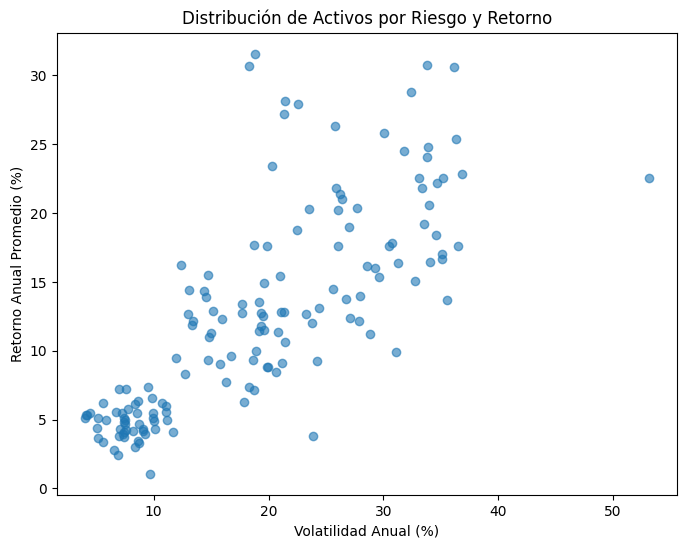


--- 2. Estandarizando los datos ---
Datos estandarizados listos para el clustering.

--- 3. Encontrando k óptimo con el Método del Codo ---


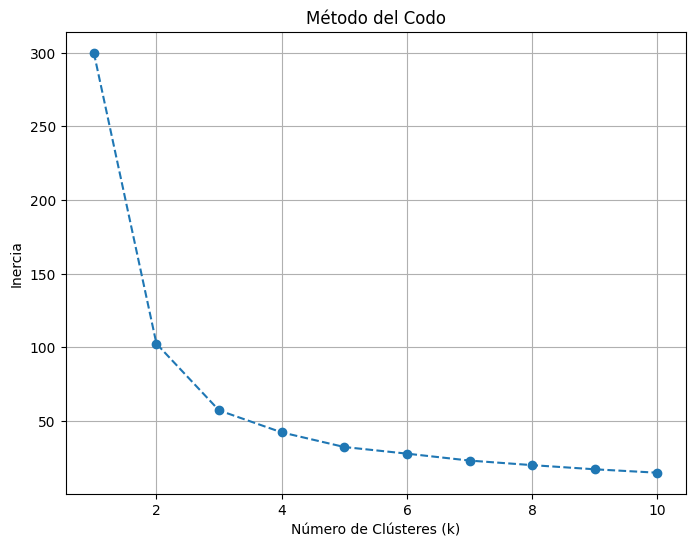

El 'codo' en el gráfico sugiere que k=3 es la elección óptima.

--- 4. Aplicando K-Means con k=3 y Visualizando ---


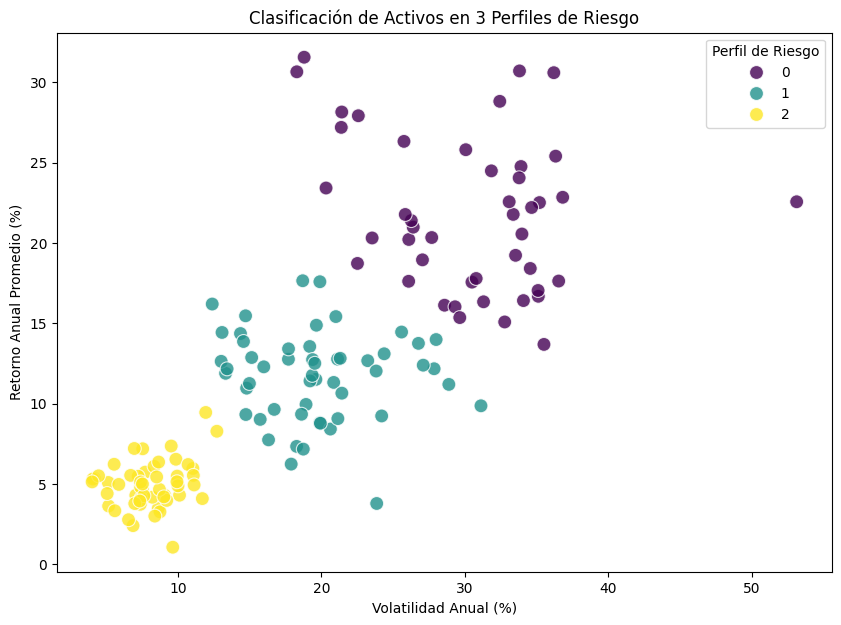


--- 5. Perfil Promedio de Cada Clúster ---
               Retorno_Anual_Promedio  Volatilidad_Anual
Perfil_Riesgo                                           
0                               21.76              30.35
1                               11.72              19.58
2                                4.95               8.03

Interpretación de los Perfiles:
Perfil 0: Activos de Crecimiento (Alto retorno, alta volatilidad).
Perfil 1: Activos Conservadores (Bajo retorno, baja volatilidad).
Perfil 2: Activos Moderados (Retorno y volatilidad intermedios).


In [6]:
# Paso 1: Generar y Visualizar los Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42) # Para reproducibilidad

# Generamos datos que forman 3 grupos de activos distintos
activos_conservadores = np.random.normal(loc=[5, 8], scale=[1.5, 2], size=(50, 2))  # Bajo retorno, baja volatilidad
activos_moderados = np.random.normal(loc=[12, 18], scale=[3, 4], size=(50, 2)) # Medio retorno, media volatilidad
activos_crecimiento = np.random.normal(loc=[20, 30], scale=[5, 6], size=(50, 2)) # Alto retorno, alta volatilidad
datos_activos = np.concatenate([activos_conservadores, activos_moderados, activos_crecimiento])

df_activos = pd.DataFrame(datos_activos, columns=['Retorno_Anual_Promedio', 'Volatilidad_Anual'])

print("--- 1. Visualización de Datos Crudos de Activos ---")
plt.figure(figsize=(8, 6))
plt.scatter(df_activos['Volatilidad_Anual'], df_activos['Retorno_Anual_Promedio'], alpha=0.6)
plt.title('Distribución de Activos por Riesgo y Retorno')
plt.xlabel('Volatilidad Anual (%)')
plt.ylabel('Retorno Anual Promedio (%)')
plt.show()


# Paso 2: Estandarizar los Datos
print("\n--- 2. Estandarizando los datos ---")
X = df_activos.copy() # Usamos una copia para mantener el DataFrame original intacto
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Datos estandarizados listos para el clustering.")


# Paso 3: Método del Codo para encontrar k
print("\n--- 3. Encontrando k óptimo con el Método del Codo ---")
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()
print("El 'codo' en el gráfico sugiere que k=3 es la elección óptima.")


# Paso 4: Aplicar K-Means Final y Visualizar
print("\n--- 4. Aplicando K-Means con k=3 y Visualizando ---")
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_activos['Perfil_Riesgo'] = kmeans_final.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
import seaborn as sns
sns.scatterplot(data=df_activos, x='Volatilidad_Anual', y='Retorno_Anual_Promedio', hue='Perfil_Riesgo', palette='viridis', s=100, alpha=0.8)
plt.title(f'Clasificación de Activos en {k_optimo} Perfiles de Riesgo')
plt.xlabel('Volatilidad Anual (%)')
plt.ylabel('Retorno Anual Promedio (%)')
plt.legend(title='Perfil de Riesgo')
plt.show()


# Paso 5: Interpretar los Clústeres
print("\n--- 5. Perfil Promedio de Cada Clúster ---")
perfil_clusters = df_activos.groupby('Perfil_Riesgo').mean().round(2)
print(perfil_clusters)
print("\nInterpretación de los Perfiles:")
print("Perfil 0: Activos de Crecimiento (Alto retorno, alta volatilidad).")
print("Perfil 1: Activos Conservadores (Bajo retorno, baja volatilidad).")
print("Perfil 2: Activos Moderados (Retorno y volatilidad intermedios).")

### **Ejercicio 7: Modelo Híbrido - Clustering para Segmentación y Regresión por Segmento**

**Instrucciones:**

**Paso 1: Generar y Visualizar un Dataset con Estructura Oculta**

1.  **Importa las librerías necesarias**, incluyendo `KMeans`, `Ridge` y `StandardScaler`.
2.  **Simula un dataset** de 100 países. El truco aquí es crear **dos grupos distintos** de países y luego unirlos:
    * **Grupo 1 (Economías en Desarrollo)**: 50 países con `Inversion_Extranjera` baja y un `Crecimiento_PIB` que responde fuertemente a esa inversión.
    * **Grupo 2 (Economías Desarrolladas)**: 50 países con `Inversion_Extranjera` alta pero un `Crecimiento_PIB` que responde de forma más modesta a la inversión.
3.  **Combina ambos grupos** en un único DataFrame `df_paises`.
4.  **Crea un gráfico de dispersión** de todos los datos (`Inversion_Extranjera` vs `Crecimiento_PIB`). Deberías poder intuir visualmente que hay dos grupos con tendencias diferentes.

**Paso 2: Segmentación de Países con K-Means**

1.  **Estandariza los datos** de las dos variables usando `StandardScaler`.
2.  **Utiliza el método del codo** (como en el ejercicio anterior) para confirmar que el número óptimo de clústeres (`k`) es 2.
3.  **Aplica K-Means con k=2** para asignar cada país a un clúster. Añade esta asignación como una nueva columna `'Cluster'` al `df_paises`.
4.  **Crea un nuevo gráfico de dispersión**, pero esta vez, **colorea los puntos** según su clúster asignado para confirmar que el algoritmo ha separado correctamente los dos grupos.

**Paso 3: Construir un Modelo de Regresión para Cada Segmento**

1.  **Filtra el DataFrame**: Crea dos DataFrames nuevos, uno para cada clúster (ej. `df_cluster_0` y `df_cluster_1`).
2.  **Entrena dos modelos Ridge separados**:
    * Un modelo `Ridge` entrenado **solo** con los datos del clúster 0.
    * Otro modelo `Ridge` entrenado **solo** con los datos del clúster 1.
3.  **Compara los coeficientes**: Imprime la pendiente (`.coef_`) de cada modelo. Deberías ver que la pendiente (el impacto de la inversión) es significativamente diferente para cada grupo.

**Paso 4: Visualización Final de los Modelos**

1.  **Crea un último gráfico de dispersión** con los puntos coloreados por clúster.
2.  **Superpón las dos líneas de regresión** que has calculado (una para cada clúster) en el mismo gráfico. Esto te permitirá visualizar claramente cómo la relación entre inversión y crecimiento cambia dependiendo del segmento de país.

--- 1. Visualización del Dataset Completo ---


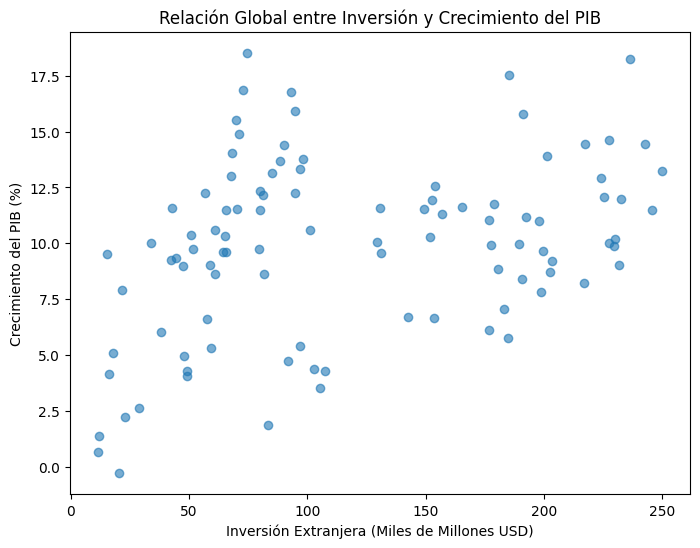


--- 2. Segmentando los países con K-Means ---


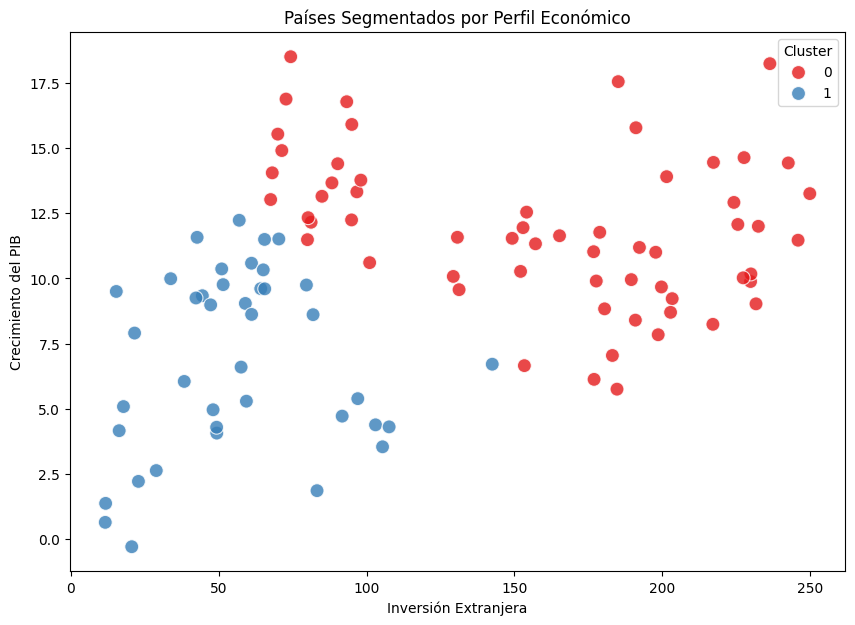


--- 3. Entrenando un Modelo de Regresión por Segmento ---
Coeficiente (Impacto de la Inversión) para Cluster 0: -0.0167
Coeficiente (Impacto de la Inversión) para Cluster 1: 0.0154

--- 4. Visualización de las Regresiones por Segmento ---


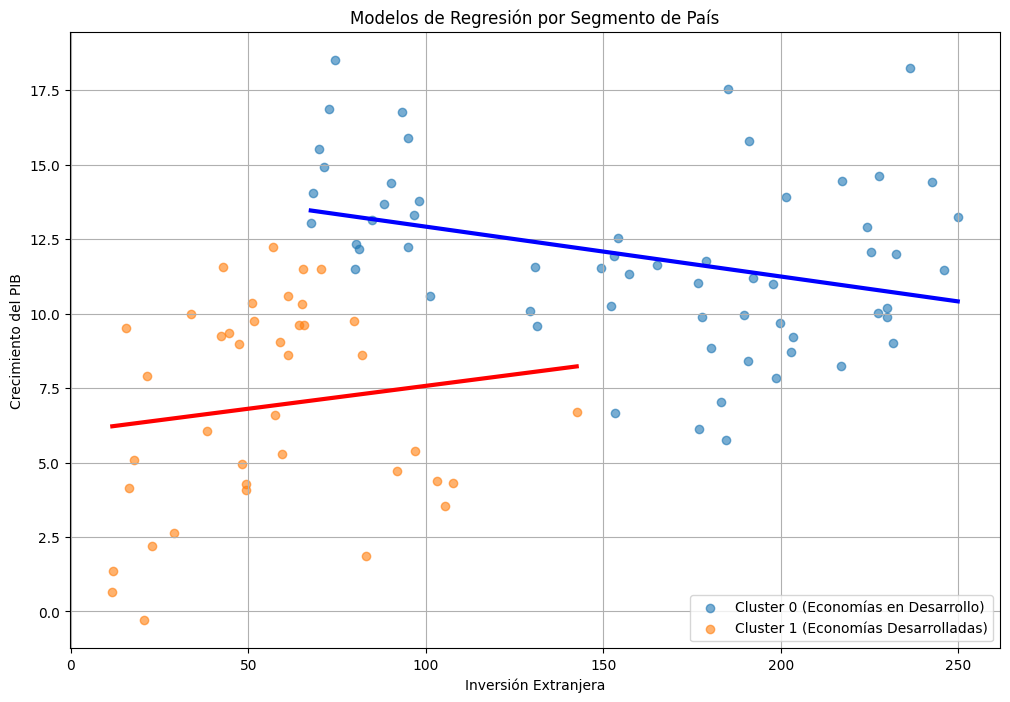

In [7]:
# Paso 1: Generar y Visualizar los Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Grupo 1: 50 economías en desarrollo
inv_dev = np.random.uniform(10, 100, 50)
pib_dev = 1.5 + inv_dev * 0.15 + np.random.normal(0, 3, 50)

# Grupo 2: 50 economías desarrolladas
inv_des = np.random.uniform(80, 250, 50)
pib_des = 3.0 + inv_des * 0.04 + np.random.normal(0, 3, 50)

# Combinar en un solo DataFrame
df_paises = pd.DataFrame({
    'Inversion_Extranjera': np.concatenate([inv_dev, inv_des]),
    'Crecimiento_PIB': np.concatenate([pib_dev, pib_des])
})

print("--- 1. Visualización del Dataset Completo ---")
plt.figure(figsize=(8, 6))
plt.scatter(df_paises['Inversion_Extranjera'], df_paises['Crecimiento_PIB'], alpha=0.6)
plt.title('Relación Global entre Inversión y Crecimiento del PIB')
plt.xlabel('Inversión Extranjera (Miles de Millones USD)')
plt.ylabel('Crecimiento del PIB (%)')
plt.show()


# Paso 2: Segmentación con K-Means
print("\n--- 2. Segmentando los países con K-Means ---")
X = df_paises.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (Omitimos el gráfico del codo por brevedad, asumimos k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_paises['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_paises, x='Inversion_Extranjera', y='Crecimiento_PIB', hue='Cluster', palette='Set1', s=100, alpha=0.8)
plt.title('Países Segmentados por Perfil Económico')
plt.xlabel('Inversión Extranjera')
plt.ylabel('Crecimiento del PIB')
plt.show()


# Paso 3: Construir un Modelo de Regresión para Cada Segmento
print("\n--- 3. Entrenando un Modelo de Regresión por Segmento ---")
# Filtrar los dataframes
df_cluster_0 = df_paises[df_paises['Cluster'] == 0]
df_cluster_1 = df_paises[df_paises['Cluster'] == 1]

# Preparar datos para cada modelo
X0, y0 = df_cluster_0[['Inversion_Extranjera']], df_cluster_0['Crecimiento_PIB']
X1, y1 = df_cluster_1[['Inversion_Extranjera']], df_cluster_1['Crecimiento_PIB']

# Entrenar modelos Ridge
modelo_0 = Ridge(alpha=1.0).fit(X0, y0)
modelo_1 = Ridge(alpha=1.0).fit(X1, y1)

print(f"Coeficiente (Impacto de la Inversión) para Cluster 0: {modelo_0.coef_[0]:.4f}")
print(f"Coeficiente (Impacto de la Inversión) para Cluster 1: {modelo_1.coef_[0]:.4f}")


# Paso 4: Visualización Final de los Modelos
print("\n--- 4. Visualización de las Regresiones por Segmento ---")
plt.figure(figsize=(12, 8))
# Graficar los puntos de cada cluster
plt.scatter(X0, y0, alpha=0.6, label='Cluster 0 (Economías en Desarrollo)')
plt.scatter(X1, y1, alpha=0.6, label='Cluster 1 (Economías Desarrolladas)')

# Graficar las líneas de regresión
plt.plot(X0.sort_values(by='Inversion_Extranjera'), modelo_0.predict(X0.sort_values(by='Inversion_Extranjera')), color='blue', linewidth=3)
plt.plot(X1.sort_values(by='Inversion_Extranjera'), modelo_1.predict(X1.sort_values(by='Inversion_Extranjera')), color='red', linewidth=3)

plt.title('Modelos de Regresión por Segmento de País')
plt.xlabel('Inversión Extranjera')
plt.ylabel('Crecimiento del PIB')
plt.legend()
plt.grid(True)
plt.show()

### **Ejercicio 8: Entrenamiento de un Modelo `Random Forest` y Predicción**

**Instrucciones:**

**Paso 1: Generar y Preparar los Datos**

1.  **Importa las librerías necesarias**: `numpy`, `pandas`, `RandomForestRegressor` y `train_test_split`.
2.  **Genera un dataset sintético**: El objetivo es predecir el `Salario` de una persona basándose en su `Edad` y `Años_Experiencia`.
    * Simula un dataset de 300 individuos.
    * La relación debe ser no lineal. Una buena fórmula es: `Salario = 20000 + (Años_Experiencia * 1500) + (Edad * 300) - (Edad * 4)**2 + ruido`. El término cuadrático negativo para la edad simula que el crecimiento salarial se desacelera en etapas posteriores.
3.  **Crea un DataFrame de Pandas** con las tres columnas.

**Paso 2: División de Datos para Entrenamiento y Prueba**

1.  **Separa las variables**: Asigna las características (`'Edad'`, `'Años_Experiencia'`) a la variable `X` y la variable objetivo (`'Salario'`) a `y`.
2.  **Divide el dataset**: Utiliza `train_test_split` para dividir los datos. Usa un `test_size=0.25` (25% para prueba) y un `random_state=42` para que la división sea reproducible. Esto creará `X_train`, `X_test`, `y_train` y `y_test`.
3.  Imprime el tamaño de los conjuntos de entrenamiento y prueba para verificar la división.

**Paso 3: Entrenar el Modelo y Realizar Predicciones**

1.  **Crea una instancia del modelo**: `rf_modelo = RandomForestRegressor(n_estimators=100, random_state=42)`.
2.  **Entrena el modelo**: Usa el método `.fit()` **únicamente** con los datos de entrenamiento (`X_train`, `y_train`).
3.  **Haz predicciones**: Usa el modelo ya entrenado para hacer predicciones sobre el conjunto de prueba (`X_test`). Guarda estas predicciones en una variable `y_pred`.
4.  **Muestra una comparación inicial**: Imprime las primeras 5 predicciones (`y_pred[:5]`) junto a los 5 valores reales correspondientes (`y_test.head()`) para ver qué tan cerca estuvo el modelo.

In [8]:
# Paso 1: Importar Librerías y Preparar los Datos
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Generar datos simulados con relación no lineal
n = 300
edad = np.random.randint(22, 65, n)
# La experiencia está relacionada con la edad, pero con variabilidad
anios_experiencia = (edad - 22) * 0.8 + np.random.normal(0, 2, n)
anios_experiencia = np.clip(anios_experiencia, 0, 40) # Evitar experiencia negativa

# El salario tiene un efecto no lineal con la edad (crece y luego se estanca)
salario_base = 20000 + (anios_experiencia * 1500) + (edad * 300) - (edad**2 * 4)
ruido = np.random.normal(0, 8000, n)
salario = salario_base + ruido

df = pd.DataFrame({
    'Edad': edad,
    'Años_Experiencia': anios_experiencia,
    'Salario': salario
})

print("--- Primeras 5 filas del Dataset Simulado ---")
print(df.head().round(2))
print("\n" + "="*50 + "\n")


# Paso 2: División de Datos para Entrenamiento y Prueba
X = df[['Edad', 'Años_Experiencia']]
y = df['Salario']

# Dividir en 75% entrenamiento, 25% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} registros")
print(f"Tamaño del conjunto de prueba: {len(X_test)} registros")
print("\n" + "="*50 + "\n")


# Paso 3: Entrenar el Modelo y Realizar Predicciones
print("--- Entrenando el modelo Random Forest ---")
# n_estimators es el número de árboles en el bosque
rf_modelo = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar solo con los datos de entrenamiento
rf_modelo.fit(X_train, y_train)
print("¡Modelo entrenado!\n")

# Predecir sobre los datos de prueba (no vistos por el modelo)
y_pred = rf_modelo.predict(X_test)

# Comparar los primeros 5 resultados
df_comparacion = pd.DataFrame({'Salario Real': y_test.head(), 'Salario Predicho': y_pred[:5]})
print("--- Comparación de Valores Reales vs. Predichos (primeros 5) ---")
print(df_comparacion.round(2))

--- Primeras 5 filas del Dataset Simulado ---
   Edad  Años_Experiencia   Salario
0    60             33.13  68291.39
1    50             24.74  59927.21
2    36             10.45  57010.67
3    64             34.61  73149.02
4    29             11.17  32279.39


Tamaño del conjunto de entrenamiento: 225 registros
Tamaño del conjunto de prueba: 75 registros


--- Entrenando el modelo Random Forest ---
¡Modelo entrenado!

--- Comparación de Valores Reales vs. Predichos (primeros 5) ---
     Salario Real  Salario Predicho
203      55995.26          57395.53
266      55362.79          57940.33
152      61022.87          56120.58
9        37009.34          40073.40
233      54016.34          56316.37


### **Ejercicio 9: Evaluación y Visualización del Rendimiento de un `Random Forest`**

**Instrucciones:**

*Este ejercicio es una continuación directa del anterior. Asegúrate de tener las variables `y_test` (los valores reales del conjunto de prueba) y `y_pred` (las predicciones que tu modelo hizo para `X_test`).*

**Paso 1: Evaluación Cuantitativa con Métricas de Regresión**

1.  **Importa las funciones necesarias** de `sklearn.metrics`: `r2_score` y `mean_squared_error`.
2.  **Calcula el Coeficiente de Determinación (R²)**: Usa `r2_score()` para comparar `y_test` y `y_pred`. Esta métrica te dice qué proporción de la varianza en los salarios es explicada por tu modelo. Un valor más cercano a 1 es mejor.
3.  **Calcula la Raíz del Error Cuadrático Medio (RMSE)**:
    * Primero, calcula el Error Cuadrático Medio con `mean_squared_error(y_test, y_pred)`.
    * Luego, obtén la raíz cuadrada de ese valor usando `np.sqrt()`. El RMSE te da una idea del error de predicción promedio en las mismas unidades que la variable objetivo (en este caso, en la moneda del salario). Un valor más bajo es mejor.
4.  **Imprime ambas métricas** con una descripción clara.

**Paso 2: Diagnóstico Visual del Modelo**

1.  **Crea un gráfico de dispersión** (`plt.scatter`) para comparar visualmente los valores reales con los predichos.
    * El eje X debe ser `y_test` (Valores Reales).
    * El eje Y debe ser `y_pred` (Valores Predichos).
2.  **Añade una "Línea de Perfección"**: Para una referencia visual clara, dibuja una línea diagonal de 45 grados donde `y = x`. Si las predicciones fueran perfectas, todos los puntos caerían sobre esta línea. Puedes hacerlo con `plt.plot([min, max], [min, max], 'r--')`.
3.  **Personaliza y muestra el gráfico**: Añade un título, etiquetas para los ejes, una cuadrícula y muestra el resultado con `plt.show()`.

--- 1. Evaluación Cuantitativa del Modelo ---
Coeficiente de Determinación (R²): 0.6617
Raíz del Error Cuadrático Medio (RMSE): $9,401.00

--- 2. Generando Diagnóstico Visual ---


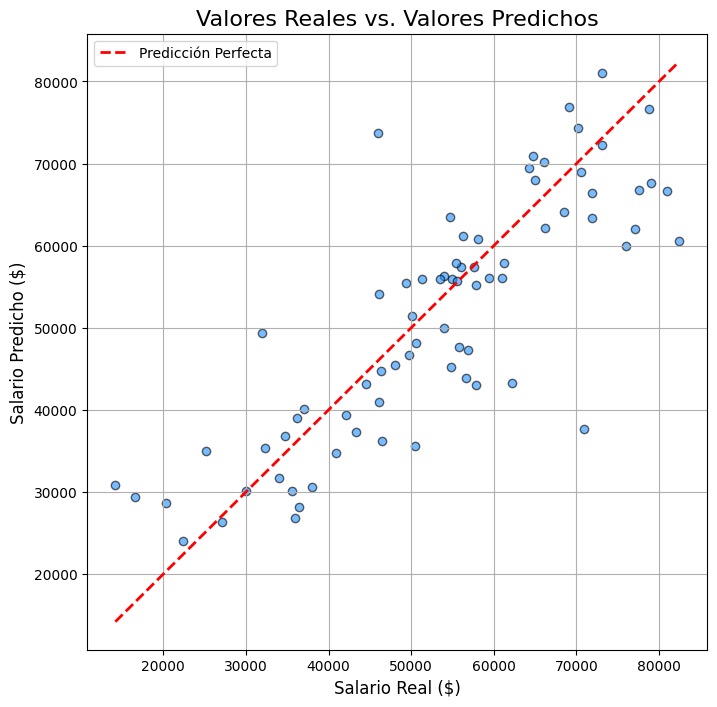

In [9]:
# --- Código de Preparación (Repaso del Ejercicio Anterior) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Importar las nuevas métricas
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)

# Generar los mismos datos que en el ejercicio anterior
n = 300
edad = np.random.randint(22, 65, n)
anios_experiencia = (edad - 22) * 0.8 + np.random.normal(0, 2, n)
anios_experiencia = np.clip(anios_experiencia, 0, 40)
salario_base = 20000 + (anios_experiencia * 1500) + (edad * 300) - (edad**2 * 4)
ruido = np.random.normal(0, 8000, n)
salario = salario_base + ruido
df = pd.DataFrame({'Edad': edad, 'Años_Experiencia': anios_experiencia, 'Salario': salario})

X = df[['Edad', 'Años_Experiencia']]
y = df['Salario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenar el modelo (como en el ejercicio anterior)
rf_modelo = RandomForestRegressor(n_estimators=100, random_state=42)
rf_modelo.fit(X_train, y_train)
y_pred = rf_modelo.predict(X_test)
# --- Fin del Código de Preparación ---


# --- INICIO DEL NUEVO EJERCICIO ---

# Paso 1: Evaluación Cuantitativa
print("--- 1. Evaluación Cuantitativa del Modelo ---")
# Calcular R-cuadrado
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse:,.2f}\n")


# Paso 2: Diagnóstico Visual del Modelo
print("--- 2. Generando Diagnóstico Visual ---")
plt.figure(figsize=(8, 8))

# Gráfico de dispersión de real vs. predicho
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolor='black')

# Línea de Perfección (y=x)
# Tomamos el mínimo y máximo de los valores reales para definir los límites de la línea
limites = [y_test.min(), y_test.max()]
plt.plot(limites, limites, 'r--', linewidth=2, label='Predicción Perfecta')

# Personalización
plt.title('Valores Reales vs. Valores Predichos', fontsize=16)
plt.xlabel('Salario Real ($)', fontsize=12)
plt.ylabel('Salario Predicho ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### **Ejercicio 10: Comparación Final - Regresión OLS vs. Random Forest en Datos No Lineales**

**Instrucciones:**

**Paso 1: Generar un Dataset con una Relación No Lineal**

1.  **Importa las librerías necesarias** (`numpy`, `pandas`, `matplotlib.pyplot`, `seaborn` y los modelos `LinearRegression` y `RandomForestRegressor` de `sklearn`).
2.  **Simula un dataset** de 200 observaciones para predecir la `Eficiencia_Productiva` de una máquina basada en su `Velocidad_Operacion`.
3.  **Crea una relación no lineal (parabólica)**: La eficiencia aumenta con la velocidad hasta un punto óptimo y luego disminuye. La fórmula será: `Eficiencia = 100 - 0.1 * (Velocidad - 50)**2 + ruido`.
4.  **Crea un DataFrame de Pandas** y **visualiza los datos crudos** con un gráfico de dispersión para observar la curva no lineal.

**Paso 2: Dividir los Datos**

1.  **Separa los datos** en características (`X`) y variable objetivo (`y`).
2.  **Divide los datos** en conjuntos de entrenamiento y prueba (usando un 75% para entrenamiento y 25% para prueba) con `train_test_split`.

**Paso 3: Entrenar y Evaluar el Modelo Lineal (OLS)**

1.  **Crea y entrena un modelo `LinearRegression`** con los datos de entrenamiento.
2.  **Realiza predicciones** sobre el conjunto de prueba y **calcula su R² y RMSE**. Imprime estas métricas.

**Paso 4: Entrenar y Evaluar el Modelo Random Forest**

1.  **Crea y entrena un modelo `RandomForestRegressor`** con los **mismos** datos de entrenamiento.
2.  **Realiza predicciones** sobre el conjunto de prueba y **calcula su R² y RMSE**. Imprime y compara estas métricas con las del modelo OLS.

**Paso 5: Visualización Comparativa de los Modelos**

1.  **Crea un único gráfico de dispersión** con los datos de **prueba** (los puntos reales).
2.  **Superpón las predicciones de ambos modelos** en el mismo gráfico:
    * Dibuja la línea de predicción del modelo **OLS**. Será una línea recta que claramente no se ajusta a la curva.
    * Dibuja la curva de predicción del modelo **Random Forest**, la cual debería seguir la forma de los datos mucho mejor.
3.  **Personaliza y muestra el gráfico** con un título, etiquetas y una leyenda que identifique cada modelo.

--- 1. Visualización del Dataset No Lineal ---


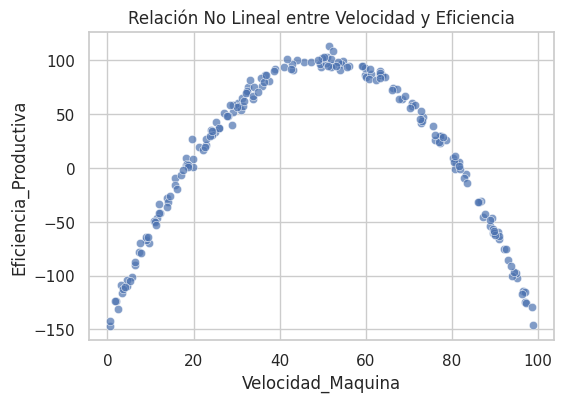


--- 2. Dividiendo datos para entrenamiento y prueba ---
Datos divididos: 150 para entrenamiento, 50 para prueba.

--- 3. Entrenando y Evaluando el Modelo Lineal (OLS) ---
Modelo OLS      - R²: 0.0001, RMSE: 70.1799

--- 4. Entrenando y Evaluando el Modelo Random Forest ---
Random Forest - R²: 0.9920, RMSE: 6.2870

--- 5. Visualización Comparativa de Modelos ---


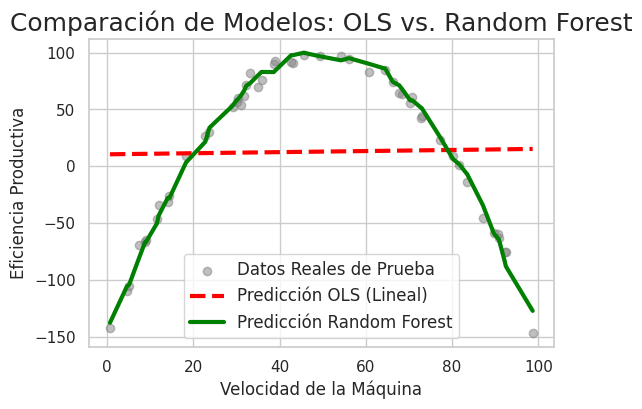


Conclusión: El R² del Random Forest es mucho más alto y su línea de predicción captura
la curva no lineal de los datos, mientras que el modelo OLS falla al intentar ajustar una línea recta.


In [13]:
# Paso 1: Generar y Visualizar los Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Cambiado de Ridge a LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)
sns.set_theme(style="whitegrid")

# Simular datos con relación no lineal
n_puntos = 200
velocidad_maquina = np.random.uniform(0, 100, n_puntos)
eficiencia = 100 - 0.1 * (velocidad_maquina - 50)**2 + np.random.normal(0, 5, n_puntos)

df = pd.DataFrame({'Velocidad_Maquina': velocidad_maquina, 'Eficiencia_Productiva': eficiencia})

print("--- 1. Visualización del Dataset No Lineal ---")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Velocidad_Maquina', y='Eficiencia_Productiva', alpha=0.7)
plt.title('Relación No Lineal entre Velocidad y Eficiencia')
plt.show()


# Paso 2: Dividir los Datos
print("\n--- 2. Dividiendo datos para entrenamiento y prueba ---")
X = df[['Velocidad_Maquina']]
y = df['Eficiencia_Productiva']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")


# Paso 3: Entrenar y Evaluar el Modelo Lineal (OLS)
print("\n--- 3. Entrenando y Evaluando el Modelo Lineal (OLS) ---")
modelo_ols = LinearRegression()
modelo_ols.fit(X_train, y_train)
y_pred_ols = modelo_ols.predict(X_test)

r2_ols = r2_score(y_test, y_pred_ols)
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
print(f"Modelo OLS      - R²: {r2_ols:.4f}, RMSE: {rmse_ols:.4f}")


# Paso 4: Entrenar y Evaluar Modelo Random Forest
print("\n--- 4. Entrenando y Evaluando el Modelo Random Forest ---")
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")


# Paso 5: Visualización Comparativa
print("\n--- 5. Visualización Comparativa de Modelos ---")
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, alpha=0.5, label='Datos Reales de Prueba', color='gray')

# Ordenar los datos para graficar las líneas correctamente
df_predicciones = pd.DataFrame({
    'X_test': X_test.values.flatten(),
    'y_pred_ols': y_pred_ols,
    'y_pred_rf': y_pred_rf
}).sort_values(by='X_test')

# Graficar las predicciones
plt.plot(df_predicciones['X_test'], df_predicciones['y_pred_ols'], color='red', linewidth=3, linestyle='--', label='Predicción OLS (Lineal)')
plt.plot(df_predicciones['X_test'], df_predicciones['y_pred_rf'], color='green', linewidth=3, label='Predicción Random Forest')

plt.title('Comparación de Modelos: OLS vs. Random Forest', fontsize=18)
plt.xlabel('Velocidad de la Máquina', fontsize=12)
plt.ylabel('Eficiencia Productiva', fontsize=12)
plt.legend(fontsize=12)
plt.show()

print("\nConclusión: El R² del Random Forest es mucho más alto y su línea de predicción captura")
print("la curva no lineal de los datos, mientras que el modelo OLS falla al intentar ajustar una línea recta.")